<a href="https://colab.research.google.com/github/Akshith213/Technocolabs/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/test (1).csv')
labels=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/test_labels.csv')
sample=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/sample_submission.csv')

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
for i in ['toxic', 'severe_toxic', 'obscene', 'threat','insult','identity_hate']:
  print('Value count of '+i+': '+str(train[train[i]==1].shape[0]))

Value count of toxic: 15294
Value count of severe_toxic: 1595
Value count of obscene: 8449
Value count of threat: 478
Value count of insult: 7877
Value count of identity_hate: 1405


In [ ]:
df_corr=train.corr()

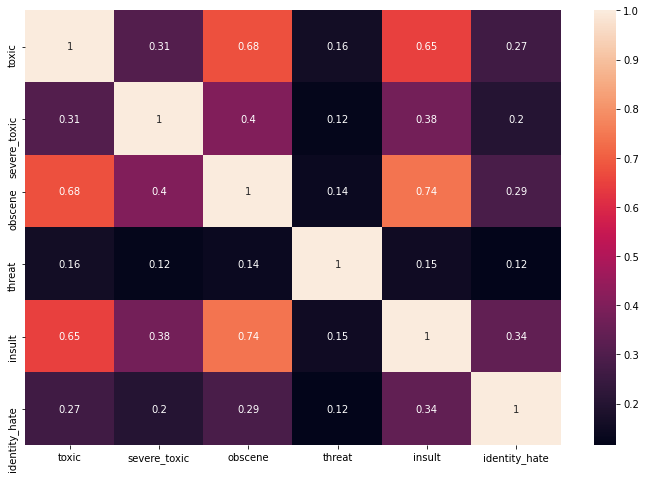

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)

In [ ]:
print('Number of characters in the longest text: ',len(train['comment_text'].max()))
print('Number of characters in the shortest text: ',len(train['comment_text'].min()))


Number of characters in the longest text:  4521
Number of characters in the shortest text:  36


In [ ]:
length=[]
for i in range(train.shape[0]):
  length.append(len(train['comment_text'][i]))

<Figure size 864x576 with 0 Axes>

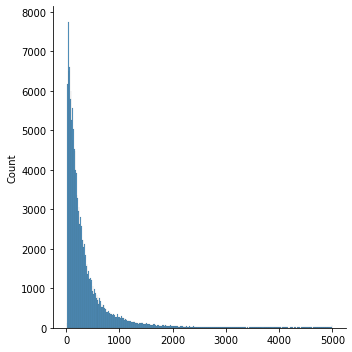

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(length)
plt.show()

In [ ]:
import nltk
#import speech_recognition as spr
import numpy as np
#import tensorflow
#import tflearn
import random
import json
import pickle
#import pyttsx3
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
import numpy as np
from numpy import dot
from numpy.linalg import norm
import string
import warnings

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
warnings.filterwarnings("ignore")
stop_words=stopwords.words('english')

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
!pip install contractions

     |████████████████████████████████| 317kB 6.3MB/s 
     |████████████████████████████████| 245kB 15.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81698 sha256=00ff389f8b0cfd64aea047fb15ee3819106301a00ff0ef0d387abdc13dda83bd
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
import contractions

In [ ]:
def text_preprocessing(df):
    #df['patterns']=df['patterns'].apply(', '.join)
    df['comment_text'] = df['comment_text'].apply(lambda i:' '.join(i.lower() for i in i.split()))
    df['comment_text']=df['comment_text'].apply(lambda i:' '.join(i for i in i.split() if not i in stop_words))
    df['comment_text']=df['comment_text'].apply(lambda i:' '.join(i for i in i.split() if not i in string.punctuation))
    df['comment_text']=df['comment_text'].apply(lambda i:' '.join(i for i in i.split() if not i.isdigit()))
    df['comment_text']= df['comment_text'].str.replace('[^\w\s]','')
    df['comment_text']=df['comment_text'].apply(lambda i:' '.join(WordNetLemmatizer().lemmatize(w) for w in i.split()))
    df['comment_text']=df['comment_text'].apply(lambda i:' '.join(contractions.fix(w) for w in i.split()))



In [ ]:
text_preprocessing(train)

In [ ]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour I am seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man I am really trying edit war guy consta...,0,0,0,0,0,0
3,0001b41b1c6bb37e,can not make real suggestion improvement wonde...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir hero chance remember page that is on,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and second time asking view completely contrad...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page 128611993,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ...,0,0,0,0,0,0
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0


In [ ]:
! pip install transformers

     |████████████████████████████████| 1.4MB 4.8MB/s 
     |████████████████████████████████| 2.9MB 31.3MB/s 
     |████████████████████████████████| 890kB 31.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=557db397b716a50c6d7ccac1b8cd5b0508e4fbc17c38d9de09f6aa13893fd3a8
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import os
import math
import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_list=train['comment_text'].values
test_list=train['comment_text'].values

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(train_list))

In [ ]:
from keras.preprocessing import text, sequence

seq = tokenizer.texts_to_sequences(train_list)
pad = sequence.pad_sequences(seq, maxlen=512)

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_list)
test_pad = sequence.pad_sequences(test_seq, maxlen=512)

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

def model_add():
    inputs = Input(shape=(512, ))
    x = Embedding(20000, 128)(inputs)
    x = Bidirectional(LSTM(50))(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = model_add()
print(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 512, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               71600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [ ]:
y_list = ["toxic","severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[y_list].values

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early = EarlyStopping(monitor="val_loss", mode="min", patience=20)
model.fit(pad, y, batch_size=32, epochs=2, validation_split=0.2, callbacks=early)

Epoch 1/2
3990/3990 [==============================] - 310s 78ms/step - loss: 0.0653 - accuracy: 0.9506 - val_loss: 0.0509 - val_accuracy: 0.9940
Epoch 2/2
3990/3990 [==============================] - 309s 78ms/step - loss: 0.0463 - accuracy: 0.9896 - val_loss: 0.0515 - val_accuracy: 0.9941


In [ ]:
test_pad[0].shape

(512,)

In [ ]:
y_test = model.predict([test_pad], batch_size=1024, verbose=1)

156/156 [==============================] - 21s 137ms/step


In [ ]:
y_test[99]

array([6.0302846e-04, 3.8033818e-07, 3.1218879e-05, 1.8127947e-07,
       4.2502725e-05, 6.2108402e-06], dtype=float32)

In [ ]:
model.save('/content/gdrive/MyDrive/Technocolabs/Mini project/model_bilstm')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Technocolabs/Mini project/model_bilstm/assets


In [ ]:
import tensorflow as tf

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Technocolabs/Mini project/model_bilstm')

In [ ]:
new_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 512, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               71600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [ ]:
y_test = new_model.predict([test_pad], batch_size=1024, verbose=1)


156/156 [==============================] - 22s 139ms/step


In [ ]:
pad.shape

(159571, 512)

In [ ]:
y.shape

(159571, 6)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pad, y, test_size=0.3, random_state=42)

In [ ]:
model = XGBClassifier(objective='multi:softmax')
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
X_train.shape

(111699, 512)